<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Shiladitya (2348556)**

I have first used all the datasets as asked in the question. They have been imported from sklearn. However, as you will see, the `diabetes` dataset is actually for regression. Although, I have changed that to `pima indian diabetes` dataset in the second half of the notebook for correction, the original results has been kept as a added proof of how `classification` looks and fails on continuous data for obvious reasons. Also, the graph of principal components on that dataset is shown to show how the components cannot be seperated. The inferences are given as we proceed...

#### *The first half...*

####Loading the data

In [1]:
from sklearn.datasets import load_breast_cancer, load_iris, load_diabetes
bc = load_breast_cancer()
bcx = bc.data
bcy = bc.target
id = load_iris()
ix = id.data
iy = id.target
dd = load_diabetes()
dx = dd.data
dy = dd.target

###PCA on all three datasets

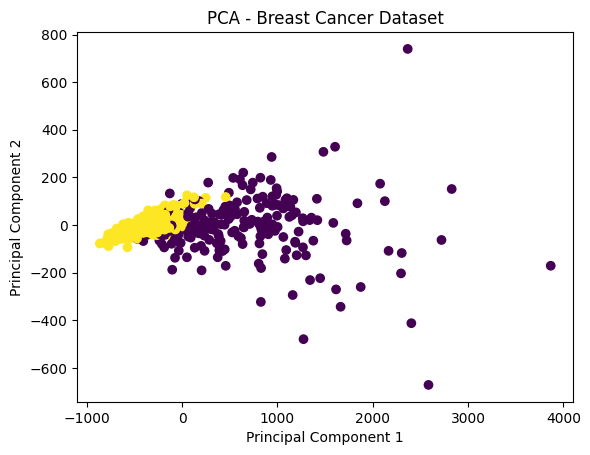

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pt
pca_bc = PCA(n_components=2)
bcx_pca = pca_bc.fit_transform(bcx)
pt.scatter(bcx_pca[:, 0], bcx_pca[:, 1], c=bcy, cmap='viridis')
pt.title('PCA - Breast Cancer Dataset')
pt.xlabel('Principal Component 1')
pt.ylabel('Principal Component 2')
pt.show()

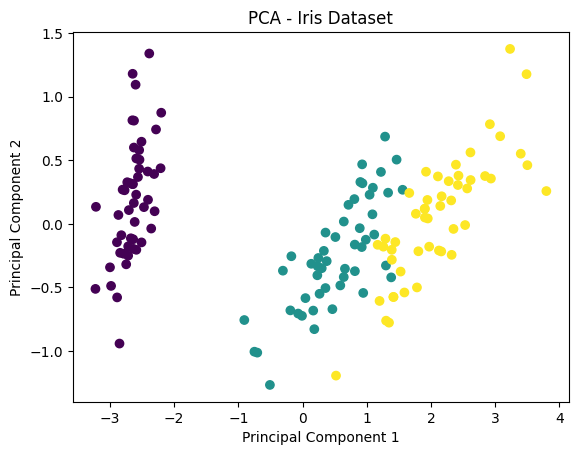

In [3]:
pca_iris = PCA(n_components=2)
pcx = pca_iris.fit_transform(ix)
pt.scatter(pcx[:, 0], pcx[:, 1], c=iy, cmap='viridis')
pt.title('PCA - Iris Dataset')
pt.xlabel('Principal Component 1')
pt.ylabel('Principal Component 2')
pt.show()

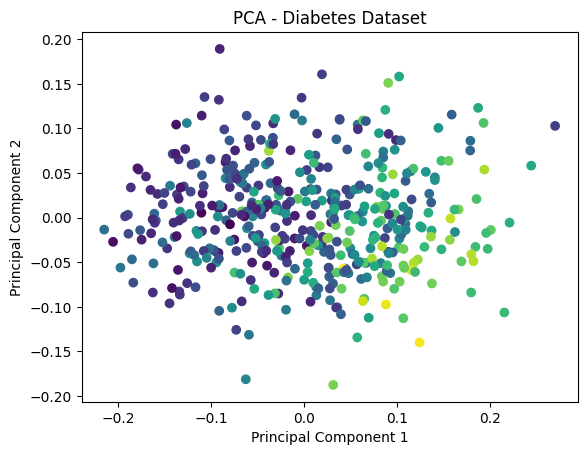

In [4]:
pca_diabetes = PCA(n_components=2)
pcad = pca_diabetes.fit_transform(dx)
pt.scatter(pcad[:, 0], pcad[:, 1], c=dy, cmap='viridis')
pt.title('PCA - Diabetes Dataset')
pt.xlabel('Principal Component 1')
pt.ylabel('Principal Component 2')
pt.show()

**Note how the above points are horribly separated - being continuous.**

###The explained variance for the datasets

In [5]:
print("Variance of the coefficients for Breast Cancer dataset:")
print(pca_bc.explained_variance_)

Variance of the coefficients for Breast Cancer dataset:
[443782.6051466    7310.10006165]


In [6]:
print("Variance of the coefficients for Iris dataset:")
print(pca_iris.explained_variance_)

Variance of the coefficients for Iris dataset:
[4.22824171 0.24267075]


In [7]:
print("Variance of the coefficients for Diabetes dataset:")
print(pca_diabetes.explained_variance_)

Variance of the coefficients for Diabetes dataset:
[0.00912519 0.00338394]


###LDA for all three datasets

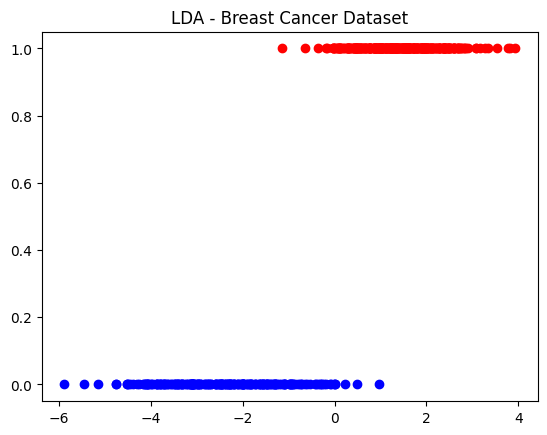

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_bc = LinearDiscriminantAnalysis(n_components=1)
lda_bc = lda_bc.fit_transform(bcx, bcy)
x_red = [xi for xi, yi in zip(lda_bc, bcy) if yi == 1]
x_blue= [xi for xi, yi in zip(lda_bc, bcy) if yi == 0]
pt.scatter( x_red, [1] * len(x_red), color='red', label='1')
pt.scatter( x_blue, [0] * len(x_blue), color='blue', label='0')
pt.title('LDA - Breast Cancer Dataset');

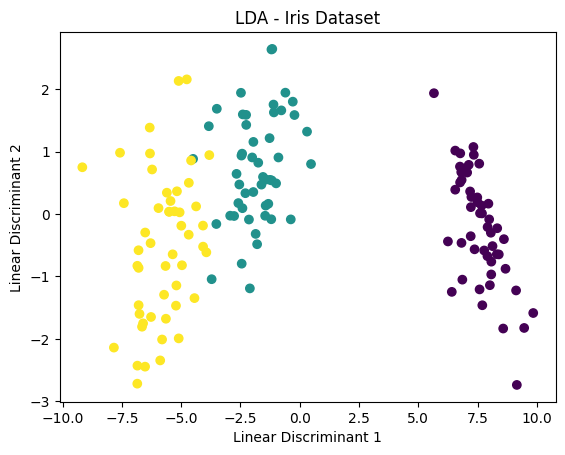

In [9]:
lda_iris = LinearDiscriminantAnalysis(n_components=2)
lda_iris = lda_iris.fit_transform(ix, iy)
pt.scatter(lda_iris[:, 0], lda_iris[:, 1], c=iy, cmap='viridis')
pt.title('LDA - Iris Dataset')
pt.xlabel('Linear Discriminant 1')
pt.ylabel('Linear Discriminant 2')
pt.show()

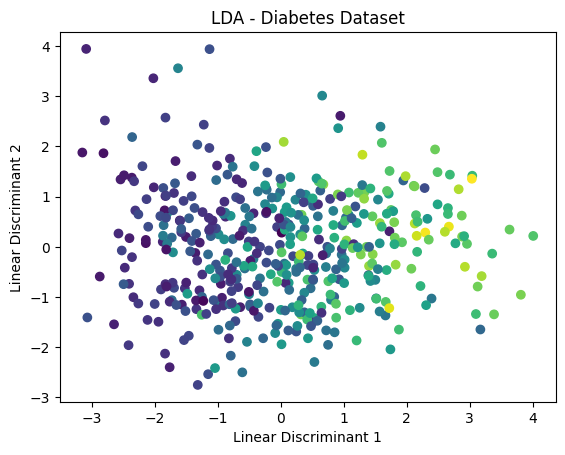

In [10]:
lda_diabetes = LinearDiscriminantAnalysis(n_components=2)
ldax = lda_diabetes.fit_transform(dx, dy)
pt.scatter(ldax[:, 0], ldax[:, 1], c=dy, cmap='viridis')
pt.title('LDA - Diabetes Dataset')
pt.xlabel('Linear Discriminant 1')
pt.ylabel('Linear Discriminant 2')
pt.show()

###All models' performance before doing any dimensionality reduction.
Note that the variable names are kept as such they are self explanatory.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(bcx, bcy, test_size=0.2)
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(ix, iy, test_size=0.2)
x_train_diabetes, x_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(dx, dy, test_size=0.2)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_bc, y_train_bc)
y_pred_bc = knn_classifier.predict(x_test_bc)
accuracy_before_pca_bc = accuracy_score(y_test_bc, y_pred_bc)

knn_classifier.fit(x_train_iris, y_train_iris)
y_pred_iris = knn_classifier.predict(x_test_iris)
accuracy_before_pca_iris = accuracy_score(y_test_iris, y_pred_iris)

knn_classifier.fit(x_train_diabetes, y_train_diabetes)
y_pred_diabetes = knn_classifier.predict(x_test_diabetes)
accuracy_before_pca_diabetes = accuracy_score(y_test_diabetes, y_pred_diabetes)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_bc, y_train_bc)
y_pred_bc = dt_classifier.predict(x_test_bc)
accuracy_before_pca_bc_dt = accuracy_score(y_test_bc, y_pred_bc)

dt_classifier.fit(x_train_iris, y_train_iris)
y_pred_iris = dt_classifier.predict(x_test_iris)
accuracy_before_pca_iris_dt = accuracy_score(y_test_iris, y_pred_iris)

dt_classifier.fit(x_train_diabetes, y_train_diabetes)
y_pred_diabetes = dt_classifier.predict(x_test_diabetes)
accuracy_before_pca_diabetes_dt = accuracy_score(y_test_diabetes, y_pred_diabetes)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_bc, y_train_bc)
y_pred_bc = rf_classifier.predict(x_test_bc)
accuracy_before_pca_bc_rf = accuracy_score(y_test_bc, y_pred_bc)

rf_classifier.fit(x_train_iris, y_train_iris)
y_pred_iris = rf_classifier.predict(x_test_iris)
accuracy_before_pca_iris_rf = accuracy_score(y_test_iris, y_pred_iris)

rf_classifier.fit(x_train_diabetes, y_train_diabetes)
y_pred_diabetes = rf_classifier.predict(x_test_diabetes)
accuracy_before_pca_diabetes_rf = accuracy_score(y_test_diabetes, y_pred_diabetes)
print("Accuracy Before Dimensionality Reduction:")
print("Breast Cancer (KNN):", accuracy_before_pca_bc)
print("Iris (KNN):", accuracy_before_pca_iris)
print("Diabetes (KNN):", accuracy_before_pca_diabetes)
print("Breast Cancer (Decision Tree):", accuracy_before_pca_bc_dt)
print("Iris (Decision Tree):", accuracy_before_pca_iris_dt)
print("Diabetes (Decision Tree):", accuracy_before_pca_diabetes_dt)
print("Breast Cancer (Random Forest):", accuracy_before_pca_bc_rf)
print("Iris (Random Forest):", accuracy_before_pca_iris_rf)
print("Diabetes (Random Forest):", accuracy_before_pca_diabetes_rf)

Accuracy Before Dimensionality Reduction:
Breast Cancer (KNN): 0.956140350877193
Iris (KNN): 0.9333333333333333
Diabetes (KNN): 0.0
Breast Cancer (Decision Tree): 0.9385964912280702
Iris (Decision Tree): 0.9333333333333333
Diabetes (Decision Tree): 0.0
Breast Cancer (Random Forest): 0.9649122807017544
Iris (Random Forest): 0.9333333333333333
Diabetes (Random Forest): 0.011235955056179775


###All models' performance after doing dimensionality reduction.

In [12]:
x_train_bc_pca = pca_bc.transform(x_train_bc)
x_test_bc_pca = pca_bc.transform(x_test_bc)

x_train_iris_pca = pca_iris.transform(x_train_iris)
x_test_iris_pca = pca_iris.transform(x_test_iris)

X_train_diabetes_pca = pca_diabetes.transform(x_train_diabetes)
X_test_diabetes_pca = pca_diabetes.transform(x_test_diabetes)

knn_classifier.fit(x_train_bc_pca, y_train_bc)
y_pred_bc_pca = knn_classifier.predict(x_test_bc_pca)
accuracy_after_pca_bc_knn = accuracy_score(y_test_bc, y_pred_bc_pca)

knn_classifier.fit(x_train_iris_pca, y_train_iris)
y_pred_iris_pca = knn_classifier.predict(x_test_iris_pca)
accuracy_after_pca_iris_knn = accuracy_score(y_test_iris, y_pred_iris_pca)

knn_classifier.fit(X_train_diabetes_pca, y_train_diabetes)
y_pred_diabetes_pca = knn_classifier.predict(X_test_diabetes_pca)
accuracy_after_pca_diabetes_knn = accuracy_score(y_test_diabetes, y_pred_diabetes_pca)

dt_classifier.fit(x_train_bc_pca, y_train_bc)
y_pred_bc_pca_dt = dt_classifier.predict(x_test_bc_pca)
accuracy_after_pca_bc_dt = accuracy_score(y_test_bc, y_pred_bc_pca_dt)

dt_classifier.fit(x_train_iris_pca, y_train_iris)
y_pred_iris_pca_dt = dt_classifier.predict(x_test_iris_pca)
accuracy_after_pca_iris_dt = accuracy_score(y_test_iris, y_pred_iris_pca_dt)

dt_classifier.fit(X_train_diabetes_pca, y_train_diabetes)
y_pred_diabetes_pca_dt = dt_classifier.predict(X_test_diabetes_pca)
accuracy_after_pca_diabetes_dt = accuracy_score(y_test_diabetes, y_pred_diabetes_pca_dt)

rf_classifier.fit(x_train_bc_pca, y_train_bc)
y_pred_bc_pca_rf = rf_classifier.predict(x_test_bc_pca)
accuracy_after_pca_bc_rf = accuracy_score(y_test_bc, y_pred_bc_pca_rf)

rf_classifier.fit(x_train_iris_pca, y_train_iris)
y_pred_iris_pca_rf = rf_classifier.predict(x_test_iris_pca)
accuracy_after_pca_iris_rf = accuracy_score(y_test_iris, y_pred_iris_pca_rf)

rf_classifier.fit(X_train_diabetes_pca, y_train_diabetes)
y_pred_diabetes_pca_rf = rf_classifier.predict(X_test_diabetes_pca)
accuracy_after_pca_diabetes_rf = accuracy_score(y_test_diabetes, y_pred_diabetes_pca_rf)

print("\nAccuracy After PCA:")
print("Breast Cancer (KNN):", accuracy_after_pca_bc_knn)
print("Iris (KNN):", accuracy_after_pca_iris_knn)
print("Diabetes (KNN):", accuracy_after_pca_diabetes_knn)
print("Breast Cancer (Decision Tree):", accuracy_after_pca_bc_dt)
print("Iris (Decision Tree):", accuracy_after_pca_iris_dt)
print("Diabetes (Decision Tree)", accuracy_after_pca_diabetes_dt)
print("Breast Cancer (Random Forest):", accuracy_after_pca_bc_rf)
print("Iris (Random Forest):", accuracy_after_pca_iris_rf)
print("Diabetes (Random Forest)", accuracy_after_pca_diabetes_rf)


Accuracy After PCA:
Breast Cancer (KNN): 0.9298245614035088
Iris (KNN): 0.9666666666666667
Diabetes (KNN): 0.0
Breast Cancer (Decision Tree): 0.9210526315789473
Iris (Decision Tree): 0.9
Diabetes (Decision Tree) 0.0
Breast Cancer (Random Forest): 0.9473684210526315
Iris (Random Forest): 0.9
Diabetes (Random Forest) 0.0


####*The second half*

###Loading the `pima indian diabetes dataset`

In [13]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Note that the outcome is binary and thus now classification can be done.**

In [15]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

###Checking model performance on this dataset before applying any dimensionality reduction technique.

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
knn_acc_beforeDR = accuracy_score(y_test, y_pred)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
dt_acc_beforeDR = accuracy_score(y_test, y_pred)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
rf_acc_beforeDR = accuracy_score(y_test, y_pred)

print("Accuracy Before Dimensionality Reduction:")
print("Diabetes (KNN):", knn_acc_beforeDR)
print("Diabetes (Decision Tree):", dt_acc_beforeDR)
print("Diabetes (Random Forest):", rf_acc_beforeDR)

Accuracy Before Dimensionality Reduction:
Diabetes (KNN): 0.8051948051948052
Diabetes (Decision Tree): 0.7012987012987013
Diabetes (Random Forest): 0.7402597402597403


###Applying PCA.

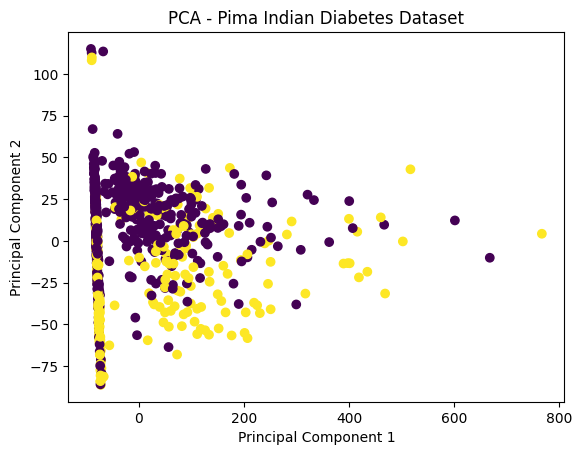

In [18]:
pca = PCA(n_components=2)
pcad = pca.fit_transform(x)
pt.scatter(pcad[:, 0], pcad[:, 1], c=y, cmap='viridis')
pt.title('PCA - Pima Indian Diabetes Dataset')
pt.xlabel('Principal Component 1')
pt.ylabel('Principal Component 2')
pt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(pcad,y,test_size=0.2)

###Model performance after applying PCA.

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
knn_acc_beforeDR = accuracy_score(y_test, y_pred)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
dt_acc_beforeDR = accuracy_score(y_test, y_pred)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
rf_acc_beforeDR = accuracy_score(y_test, y_pred)

print("Accuracy Before Dimensionality Reduction:")
print("Diabetes (KNN):", knn_acc_beforeDR)
print("Diabetes (Decision Tree):", dt_acc_beforeDR)
print("Diabetes (Random Forest):", rf_acc_beforeDR)

Accuracy Before Dimensionality Reduction:
Diabetes (KNN): 0.6883116883116883
Diabetes (Decision Tree): 0.6688311688311688
Diabetes (Random Forest): 0.7337662337662337


###Applying LDA.

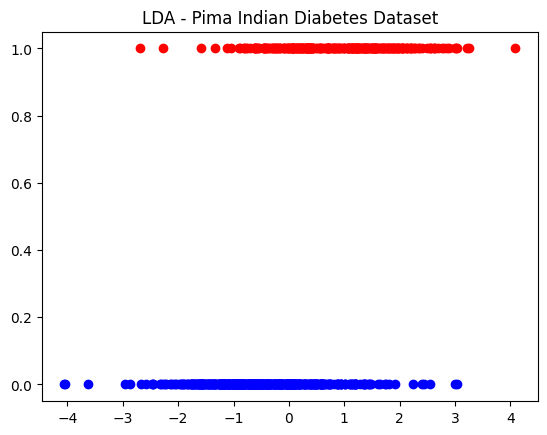

In [27]:
lda_dd = LinearDiscriminantAnalysis(n_components=1)
lda_d = lda_dd.fit_transform(x, y)
x_red = [xi for xi, yi in zip(lda_d, y) if yi == 1]
x_blue= [xi for xi, yi in zip(lda_d, y) if yi == 0]
pt.scatter( x_red, [1] * len(x_red), color='red', label='1')
pt.scatter( x_blue, [0] * len(x_blue), color='blue', label='0')
pt.title('LDA - Pima Indian Diabetes Dataset');

In [28]:
x_train, x_test, y_train, y_test = train_test_split(lda_d,y,test_size=0.2)

###Model performance after applying LDA.

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
knn_acc_beforeDR = accuracy_score(y_test, y_pred)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
dt_acc_beforeDR = accuracy_score(y_test, y_pred)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
rf_acc_beforeDR = accuracy_score(y_test, y_pred)

print("Accuracy Before Dimensionality Reduction:")
print("Diabetes (KNN):", knn_acc_beforeDR)
print("Diabetes (Decision Tree):", dt_acc_beforeDR)
print("Diabetes (Random Forest):", rf_acc_beforeDR)

Accuracy Before Dimensionality Reduction:
Diabetes (KNN): 0.7662337662337663
Diabetes (Decision Tree): 0.6948051948051948
Diabetes (Random Forest): 0.6948051948051948
